In [1]:
# encoding: utf-8
import math
import random
import copy


sqrt2 = math.sqrt(2)
sqrtPi = math.sqrt(math.pi)

def erf(x):
    return math.erf(x) * 0.5


def erfs2(ld, C, sigma):
    return erf(sqrt2 * (ld - C) / sigma)


def subsethood(inC, inSigma, outC, outSigma):
    if inC == outC:
        if inSigma > outSigma:
            return outSigma / inSigma
        else:
            return inSigma / outSigma
    elif inC > outC:
        tmp = inC; inC = outC; outC = tmp
        tmp = inSigma; inSigma = outSigma; outSigma = tmp

    # avoid outSigma - inSigma is 0
    if outSigma != inSigma:
        ld1 = (outSigma * inC - inSigma * outC) / (outSigma - inSigma)
        erfs2_ld1_i = erfs2(ld1, inC, inSigma)
        erfs2_ld1_o = erfs2(ld1, outC, outSigma)

    ld2 = (outSigma * inC + inSigma * outC) / (outSigma + inSigma)
    erfs2_ld2_i = erfs2(ld2, inC, inSigma)
    erfs2_ld2_o = erfs2(ld2, outC, outSigma)

    if inSigma == outSigma:
        numerator = inSigma * (0.5 - erfs2_ld2_i) + outSigma * (0.5 + erfs2_ld2_o)
        denominator = inSigma * (0.5 + erfs2_ld2_i) + outSigma * (0.5 - erfs2_ld2_o)
    elif inSigma < outSigma:
        numerator = outSigma * (erfs2_ld2_o - erfs2_ld1_o) + inSigma * (1 + erfs2_ld1_i - erfs2_ld2_i)
        denominator = outSigma * (1 + erfs2_ld1_o - erfs2_ld2_o) + inSigma * (erfs2_ld2_i - erfs2_ld1_i)
    else:
        numerator = outSigma * (1 + erfs2_ld2_o - erfs2_ld1_o) + inSigma * (erfs2_ld1_i - erfs2_ld2_i)
        denominator = outSigma * (erfs2_ld1_o - erfs2_ld2_o) + inSigma * (1 + erfs2_ld2_i - erfs2_ld1_i)

    return numerator / denominator


def card(inC, inSigma, outC, outSigma):
    if inC == outC:
        if inSigma < outSigma:
            return inSigma * sqrtPi
        else:
            return outSigma * sqrtPi
    elif inC > outC:
        tmp = inC; inC = outC; outC = tmp
        tmp = inSigma; inSigma = outSigma; outSigma = tmp
    
    # avoid outSigma - inSigma is 0
    if outSigma != inSigma:
        ld1 = (outSigma * inC - inSigma * outC) / (outSigma - inSigma)
        erfs2_ld1_i = erfs2(ld1, inC, inSigma)
        erfs2_ld1_o = erfs2(ld1, outC, outSigma)

    ld2 = (outSigma * inC + inSigma * outC) / (outSigma + inSigma)
    erfs2_ld2_i = erfs2(ld2, inC, inSigma)
    erfs2_ld2_o = erfs2(ld2, outC, outSigma)

    if inSigma == outSigma:
        return outSigma * sqrtPi * (erfs2_ld2_o + 0.5) + inSigma * sqrtPi * (0.5 - erfs2_ld2_i)
    elif inSigma < outSigma:
        return inSigma * sqrtPi * (1 + erfs2_ld1_i - erfs2_ld2_i) + outSigma * sqrtPi * (erfs2_ld2_o - erfs2_ld1_o)
    else:
        return outSigma * sqrtPi * (1 + erfs2_ld2_o - erfs2_ld1_o) + inSigma * sqrtPi * (erfs2_ld1_i - erfs2_ld2_i)


def deltaCardC(inC, inSigma, outC, outSigma):
    if inC == outC:
        return 0

    # avoid outSigma - inSigma is 0
    if outSigma != inSigma:
        ld1 = (outSigma * inC - inSigma * outC) / (outSigma - inSigma)
        ld1_i = (ld1 - inC) / inSigma
        ld1_o = (ld1 - outC) / outSigma
        exp_ld1_i = math.exp(-ld1_i**2)
        exp_ld1_o = math.exp(-ld1_o**2)

    ld2 = (outSigma * inC + inSigma * outC) / (outSigma + inSigma)
    ld2_i = (ld2 - inC) / inSigma
    ld2_o = (ld2 - outC) / outSigma
    exp_ld2_i = math.exp(-ld2_i**2)
    exp_ld2_o = math.exp(-ld2_o**2)

    if inC < outC:
        if inSigma == outSigma:
            return exp_ld2_i
        elif inSigma < outSigma:
            return exp_ld2_i - exp_ld1_i
        else:
            return exp_ld2_i - exp_ld1_i
    else:
        if inSigma == outSigma:
            return -exp_ld2_i
        elif inSigma < outSigma:
            return exp_ld1_i - exp_ld2_i
        else:
            return exp_ld1_i - exp_ld2_i


def deltaCardSigma(inC, inSigma, outC, outSigma):
    if inC == outC:
        if inSigma == outSigma:
            return 0
        elif inSigma < outSigma:
            return 1.0 / outSigma
        else:
            return -outSigma / inSigma ** 2

    # avoid outSigma - inSigma is 0
    if outSigma != inSigma:
        ld1 = (outSigma * inC - inSigma * outC) / (outSigma - inSigma)
        erfs2_ld1_i = erfs2(ld1, inC, inSigma)
        ld1_i = (ld1 - inC) / inSigma
        exp_ld1_i = math.exp(-ld1_i**2)

    ld2 = (outSigma * inC + inSigma * outC) / (outSigma + inSigma)
    erfs2_ld2_i = erfs2(ld2, inC, inSigma)
    ld2_i = (ld2 - inC) / inSigma
    exp_ld2_i = math.exp(-ld2_i**2)

    if inC < outC:
        if inSigma == outSigma:
            return ld2_i * exp_ld2_i + sqrtPi * (0.5 - erfs2_ld2_i)
        elif inSigma < outSigma:
            return ld2_i * exp_ld2_i - ld1_i * exp_ld1_i + sqrtPi * (1 + erfs2_ld1_i - erfs2_ld2_i)
        else:
            return ld2_i * exp_ld2_i - ld1_i * exp_ld1_i + sqrtPi * (erfs2_ld1_i - erfs2_ld2_i)
    else:
        if inSigma == outSigma:
            return sqrtPi * (0.5 + erfs2_ld2_i) - ld2_i * exp_ld2_i
        elif inSigma < outSigma:
            return ld1_i * exp_ld1_i - ld2_i * exp_ld2_i + sqrtPi * (1 + erfs2_ld2_i - erfs2_ld1_i)
        else:
            return ld1_i * exp_ld1_i - ld2_i * exp_ld2_i + sqrtPi * (erfs2_ld2_i - erfs2_ld1_i)


def deltaSubsetC(inC, inSigma, outC, outSigma):
    _deltaCardC = deltaCardC(inC, inSigma, outC, outSigma)
    numerator = card(inC, inSigma, outC, outSigma)
    denominator = sqrtPi * (outSigma + inSigma) - numerator
    return ( _deltaCardC * denominator - numerator * (-_deltaCardC) ) / denominator ** 2


def deltaSubsetSigma(inC, inSigma, outC, outSigma):
    _deltaCardSigma = deltaCardSigma(inC, inSigma, outC, outSigma)
    numerator = card(inC, inSigma, outC, outSigma)
    denominator = sqrtPi * (outSigma + inSigma) - numerator
    return ( _deltaCardSigma * denominator - numerator * (sqrtPi - _deltaCardSigma) ) / denominator ** 2

In [2]:
class Concept(object):
    def __init__(self, numOfTerms):
        self.numOfTerms = numOfTerms
        self.C = []
        self.sigma = []
        self.xi = []
        for i in range(numOfTerms):
            self.C.append(random.uniform(i * 2.0  / numOfTerms, (i + 1) * 2.0  / numOfTerms))
            self.sigma.append(random.uniform(0, 1))  # sigma > 0
            self.xi.append(random.uniform(0, 1))


class FCM_FNN(object):
    def __init__(self, *numOfTermsList):
        self.concepts = []
        for numOfTerms in numOfTermsList:
            self.concepts.append(Concept(numOfTerms))
        # 把下标0的层忽略掉
        self.layerf = [[] for i in range(5)]
        self.layerx = [[] for i in range(5)]
        # layer1
        self.layerf[1] = [0 for i in range(len(numOfTermsList))]
        self.layerx[1] = [0 for i in range(len(numOfTermsList))]
        # layer2
        self.layerf[2] = [[] for i in range(len(numOfTermsList))]
        self.layerx[2] = [[] for i in range(len(numOfTermsList))]
        for i in range(len(numOfTermsList)):
            for count in range(numOfTermsList[i]):
                self.layerf[2][i].append(0)
                self.layerx[2][i].append(0)
        # layer3
        self.layerf[3] = [[] for i in range(len(numOfTermsList))]
        self.layerx[3] = [[] for i in range(len(numOfTermsList))]
        for oj in range(len(numOfTermsList)):
            for omj in range(numOfTermsList[oj]):
                self.layerx[3][oj].append(0)
                self.layerf[3][oj].append([])
                for ii in range(len(numOfTermsList)):
                    self.layerf[3][oj][omj].append([])
                    for ini in range(numOfTermsList[ii]):
                        self.layerf[3][oj][omj][ii].append(0)
        # layer4
        self.layerf[4] = [0 for i in range(len(numOfTermsList))]
        self.layerx[4] = [0 for i in range(len(numOfTermsList))]


    def predict(self, X):
        if len(X) != len(self.concepts):
            raise Exception("The dimension of X is inavailable")
        # layer1
        for i, v in enumerate(X):
            self.layerf[1][i] = v
            self.layerx[1][i] = self.layerf[1][i]

        # layer2
        for ii, concept in enumerate(self.concepts):
            for ini in range(concept.numOfTerms):
                self.layerf[2][ii][ini] = -((self.layerx[1][ii] - concept.C[ini]) / concept.sigma[ini]) ** 2
                self.layerx[2][ii][ini] = math.exp(self.layerf[2][ii][ini])

        # layer3
        # f
        for oj, oconcept in enumerate(self.concepts):
            for omj in range(oconcept.numOfTerms):
                for ii, iconcept in enumerate(self.concepts):
                    for ini in range(iconcept.numOfTerms):
                        self.layerf[3][oj][omj][ii][ini] = self.layerx[2][ii][ini] * \
                            (1 - subsethood(iconcept.C[ini], iconcept.sigma[ini], oconcept.C[omj], oconcept.sigma[omj]))
        # x
        for oj, oconcept in enumerate(self.concepts):
            for omj in range(oconcept.numOfTerms):
                numerator = 0
                denominator = 0
                for ii, iconcept in enumerate(self.concepts):
                    if ii != oj:
                        for ini in range(iconcept.numOfTerms):
                            numerator += self.layerf[3][oj][omj][ii][ini] * iconcept.C[ini] * iconcept.sigma[ini]
                            denominator += self.layerf[3][oj][omj][ii][ini] * iconcept.sigma[ini]
                self.layerx[3][oj][omj] = numerator / denominator

        # layer4
        for oj, concept in enumerate(self.concepts):
            self.layerf[4][oj] = 0
            for omj in range(concept.numOfTerms):
                self.layerf[4][oj] += concept.xi[omj] * self.layerx[3][oj][omj]
            self.layerx[4][oj] = self.layerf[4][oj]

        return copy.copy(self.layerx[4])


    def test(self, dataSet):
        err = 0
        for X, D in dataSet:
            Y = self.predict(X)
            tmpErr = 0
            for j in range(len(Y)):
                tmpErr += 0.5 * (D[j] - Y[j]) ** 2
            err += tmpErr
        return math.sqrt(err * 2 / (len(dataSet) * len(dataSet[0][1])))


    def train(self, dataSet, learnRate=0.01):
        err = 0
        for X, D in dataSet:
            Y = self.predict(X)

            tmpErr = 0
            for j in range(len(Y)):
                tmpErr += 0.5 * (D[j] - Y[j]) ** 2
            err += tmpErr

            for ii, iconcept in enumerate(self.concepts):
                for ini in range(iconcept.numOfTerms):
                    # xi
                    deltaXi = - (D[ii] - Y[ii]) * self.layerx[3][ii][ini]
                    iconcept.xi[ini] -= learnRate * deltaXi

                    # C, sigma
                    deltaC = 0
                    deltaSigma = 0
                    for l, lconcept in enumerate(self.concepts):
                        if l == ii: continue
                        mlSumC = 0
                        mlSumSigma = 0
                        for ml in range(lconcept.numOfTerms):
                            numerator = denominator = 0
                            for ti, tconcept in enumerate(self.concepts):
                                if ti != l:
                                    for tni in range(tconcept.numOfTerms):
                                        numerator += self.layerf[3][l][ml][ti][tni] * tconcept.C[tni] * tconcept.sigma[tni]
                                        denominator += self.layerf[3][l][ml][ti][tni] * tconcept.sigma[tni]
                            delta_yl = lconcept.xi[ml]
                            delta_x = (iconcept.C[ini] * iconcept.sigma[ini] * denominator - iconcept.sigma[ini] * numerator) / denominator ** 2
                            delta_f_C = self.layerx[2][ii][ini] * (2 * (self.layerx[1][ii] - iconcept.C[ini]) / iconcept.sigma[ini] ** 2) \
                                * (1 - subsethood(iconcept.C[ini], iconcept.sigma[ini], lconcept.C[ml], lconcept.sigma[ml])) \
                                - self.layerx[2][ii][ini] * deltaSubsetC(iconcept.C[ini], iconcept.sigma[ini], lconcept.C[ml], lconcept.sigma[ml])
                            delta_f_Sigma = self.layerx[2][ii][ini] * (2 * (self.layerx[1][ii] - iconcept.C[ini]) ** 2 / iconcept.sigma[ini] ** 3) \
                                * (1 - subsethood(iconcept.C[ini], iconcept.sigma[ini], lconcept.C[ml], lconcept.sigma[ml])) \
                                - self.layerx[2][ii][ini] * deltaSubsetSigma(iconcept.C[ini], iconcept.sigma[ini], lconcept.C[ml], lconcept.sigma[ml])

                            mlSumC += delta_yl * delta_x * delta_f_C
                            mlSumSigma += delta_yl * delta_x * delta_f_Sigma

                        deltaC += mlSumC * (Y[l] - D[l])
                        deltaSigma += mlSumSigma * (Y[l] - D[l])

                    iconcept.C[ini] -= learnRate * deltaC
                    iconcept.sigma[ini] -= learnRate * deltaSigma
                    if iconcept.sigma[ini] < 0:
                        iconcept.sigma[ini] = 1e-100
                        print("Warn: maybe it's impossible to train with this DataSet and learning rate")
        return math.sqrt(err * 2 / (len(dataSet) * len(dataSet[0][1])))

In [30]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  9 09:51:36 2020

@author: JiaoJy
"""
# encoding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def loadDataSet(filepath):
    data = pd.read_csv(filepath,index_col = 0)
    data = np.array(data).tolist()
    labelSet = []
    testSet = []
    for i in range(8,8 + 500):
        labelSet.append((data[i][:],data[i+1][:]))
    for i in range(8 + 500, 8 + 1000):
        testSet.append((data[i][:],data[i+1][:]))
    return labelSet,testSet

def loadDataSets(filepath):
    data = pd.read_csv(filepath,index_col = 0)
    data = np.array(data).tolist()
    labelSet = []
    testSet = []
    for i in range(8,8 + 500):
        labelSet.append(data[i][:])
    for i in range(8 + 500, 8 + 1000):
        testSet.append(data[i][:])
    return labelSet,testSet

def errorLp(p,data_pre,data_real):
    dist = np.linalg.norm(data_pre-data_real,ord=p)/(len(data_pre))
    return dist

def MSE(data_pre,data_real):
    dist = [0] * data_pre.shape[1]

    dist_temp = (np.power((data_pre - data_real),2))/data_pre.shape[0]
    dist = dist_temp.sum(axis=0)
    return dist


def RMSE(M):
    dist = np.power(M,0.5)
    return dist


def drawPre(title,preData,realData,dataNum=50):
    plt.title(title)
    plt.plot(range(dataNum), preData, color='green', label='predict');
    plt.plot(range(dataNum), realData, color='red', label='real');
    plt.legend();
    plt.xlabel('time');
    plt.ylabel('value');
    plt.show();

def draw(title,data,label,dataNum):
    plt.plot(range(dataNum), train_err, color='green',label=label);
    plt.legend();
    plt.title(title);
    plt.xlabel('time');
    plt.ylabel(label);
    plt.show();
    

[([0.066871166, 0.071347421, 0.067484663, 0.05862304], [0.071347421, 0.067484663, 0.05862304, 0.055896387]), ([0.071347421, 0.067484663, 0.05862304, 0.055896387], [0.067484663, 0.05862304, 0.055896387, 0.063826403]), ([0.067484663, 0.05862304, 0.055896387, 0.063826403], [0.05862304, 0.055896387, 0.063826403, 0.089888662]), ([0.05862304, 0.055896387, 0.063826403, 0.089888662], [0.055896387, 0.063826403, 0.089888662, 0.062553965]), ([0.055896387, 0.063826403, 0.089888662, 0.062553965], [0.063826403, 0.089888662, 0.062553965, 0.069416042]), ([0.063826403, 0.089888662, 0.062553965, 0.069416042], [0.089888662, 0.062553965, 0.069416042, 0.065814588]), ([0.089888662, 0.062553965, 0.069416042, 0.065814588], [0.062553965, 0.069416042, 0.065814588, 0.041036128]), ([0.062553965, 0.069416042, 0.065814588, 0.041036128], [0.069416042, 0.065814588, 0.041036128, 0.034083163]), ([0.069416042, 0.065814588, 0.041036128, 0.034083163], [0.065814588, 0.041036128, 0.034083163, 0.034219496]), ([0.065814588, 0

In [110]:
########将6个输入作为因果关系##########
if __name__ == "__main__":
    labelSet, testSet = loadDataSet("E:/Spyderfile/reference_FCMs/FCM_FNN/data/dataProcess.csv")
    
    
    # with open("fnn.bin", "rb") as f:
    #     fnn = pickle.loads(f.read())

    #fnn = FCM_FNN(3,3,3,3)
    fnn = FCM_FNN(2,2,2,2,2,2)
    train_err = []
    for i in range(200):
        #print("train err: %s   test err: %s" % (fnn.train(labelSet, 0.02), fnn.test(testSet)))
        train_err.append(fnn.train(labelSet,0.02))
        #fnn.test(testSet)
    
    # print("write fnn data")
    # with open("fnn.bin", "wb") as f:
    #     f.write(pickle.dumps(fnn))

    print("write test files")
    testDatas = []
    for X, D in testSet:
        testDatas.append(D)
    #testData += testSet[-1][1][0:6]
    with open("testData.csv", "w") as f:
        f.write("\n".join(map(lambda v:str(v), testDatas)))

    print("write predict files")
    predictDatas = []
    for X, D in testSet:
        predictDatas.append(fnn.predict(X))
    #predictData += fnn.predict(testSet[-1][0])[0:6]
    with open("predictData.csv", "w") as f:
        f.write("\n".join(map(lambda v:str(v), predictDatas)))

write test files
write predict files


In [19]:
########将单个准则的后续列表############
if __name__ == "__main__":
    labelSets, testSets = loadDataSets("E:/Spyderfile/reference_FCMs/FCM_FNN/data/dataProcess.csv")
labelSets = np.array(labelSets).T.tolist()
testSets = np.array(testSets).T.tolist()

testData = []
predictData = []

for i in range(len(labelSets)):
    labelSet = []
    testSet = []
    
    
    for j in range(len(labelSets[i])-4):
        labelSet.append((labelSets[i][j:j+4],labelSets[i][j+1:j+5]))
    for j in range(len(testSets[i])-4):
        testSet.append((testSets[i][j:j+4],testSets[i][j+1:j+5]))
    fnn = FCM_FNN(4,4,4,4)
    train_err = []
    for i in range(25):
        #print("train err: %s   test err: %s" % (fnn.train(labelSet, 0.02), fnn.test(testSet)))
        train_err.append(fnn.train(labelSet,0.02))
        #fnn.test(testSet)
    
    testDatas = []
    for X, D in testSet:
        testDatas.append(D[0])
    testDatas += testSet[-1][1][0:4]
    testData.append(testDatas)
    
    predictDatas = []
    for X, D in testSet:
        predictDatas.append(fnn.predict(X)[0])
    predictDatas += fnn.predict(testSet[-1][0])[0:4]
    predictData.append(predictDatas)


print("write test files")
with open("testData.csv", "w") as f:
        f.write("\n".join(map(lambda v:str(v), testData)))    
print("write predict files")
with open("predictData.csv", "w") as f:
        f.write("\n".join(map(lambda v:str(v), predictData)))

write test files
write predict files


(6, 500)
(6, 500)


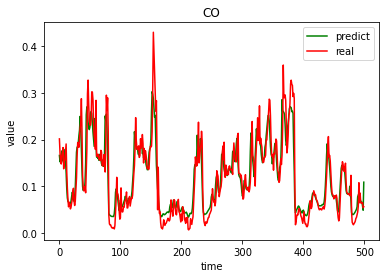

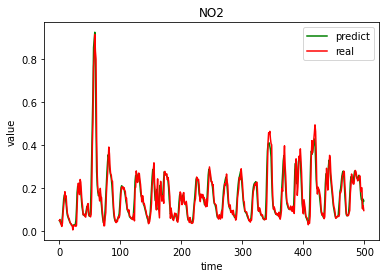

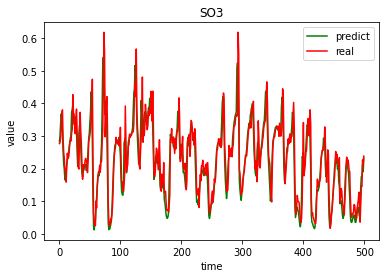

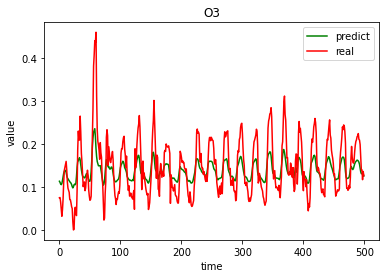

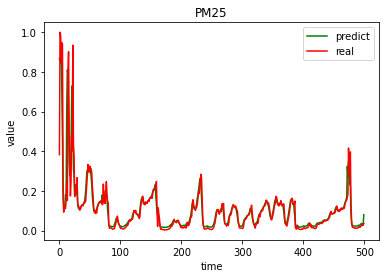

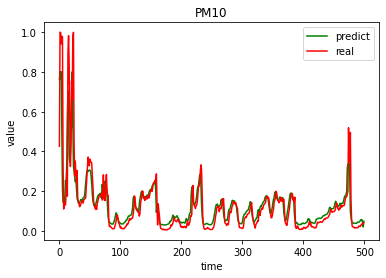

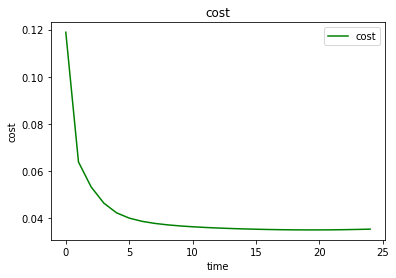

In [22]:
testData = np.array(testData)
predictData = np.array(predictData)
data_pre = predictData
data_test = testData
print(data_pre.shape)
print(data_test.shape)
drawPre("CO",data_pre[0,:],data_test[0,:],len(data_pre[0]))
drawPre("NO2",data_pre[1,:],data_test[1,:],len(data_pre[1]))
drawPre("SO3",data_pre[2,:],data_test[2,:],len(data_pre[2]))
drawPre("O3",data_pre[3,:],data_test[3,:],len(data_pre[3]))
drawPre("PM25",data_pre[4,:],data_test[4,:],len(data_pre[4]))
drawPre("PM10",data_pre[5,:],data_test[5,:],len(data_pre[5]))
draw("cost",train_err,"cost",len(train_err))

In [64]:
testData

[[0.201454215,
  0.047038435999999996,
  0.27642034,
  0.074972099,
  0.38261429,
  0.425787874],
 [0.17116564399999998,
  0.052274590999999995,
  0.27970091399999997,
  0.075408808,
  1.0,
  1.0],
 [0.154510339, 0.038199707, 0.296167693, 0.06483448, 0.983977323, 0.998996659],
 [0.147602818,
  0.027180799999999998,
  0.320601581,
  0.047179495,
  0.851493708,
  0.94120421],
 [0.165871393,
  0.01987627,
  0.370939224,
  0.031764043,
  0.9475594070000001,
  0.9797325090000001],
 [0.17382413100000002,
  0.035920147,
  0.37995015200000004,
  0.046791309,
  0.9386434000000001,
  0.9769231540000001],
 [0.18291297399999998,
  0.083293995,
  0.29254628,
  0.071665055,
  0.249427044,
  0.319704616],
 [0.137309702,
  0.11273572,
  0.249664487,
  0.110655325,
  0.09274858300000001,
  0.10996618699999999],
 [0.153896842,
  0.14722726,
  0.231685235,
  0.138600964,
  0.11938603199999999,
  0.139564751],
 [0.156623495, 0.18153246, 0.195194172, 0.145991423, 0.1108721, 0.130303912],
 [0.174505794,
  0

In [28]:
data_pre = predictData.T
data_test = testData.T
mse = np.mean(np.square(data_pre - data_test))
rmse = np.sqrt(np.mean(np.square(data_pre - data_test)))
mae = np.mean(np.abs(data_pre-data_test))
print("MSE %s " % mse)
print("RMSE %s " % rmse)
print("MAE %s " % mae)
print("欧式距离：%s" % errorLp(2,predictData,testData))

MSE 0.002955397834205976 
RMSE 0.05436357083751927 
MAE 0.03049678919742224 
欧式距离：0.362509356827954


In [31]:
Mwucha = MSE(data_pre,data_test)
Rwucha = RMSE(Mwucha)
print("MSE %s " % Mwucha)
print("RMSE %s " % Rwucha)

MSE [0.00110408 0.00168509 0.00221502 0.00238469 0.00372142 0.00662209] 
RMSE [0.03322768 0.04104981 0.04706401 0.04883326 0.06100347 0.08137622] 


In [ ]:
MSE [0.00715872 0.0164495  0.01097344 0.0052193  0.01369196 0.01697095] 
RMSE [0.0846092  0.12825561 0.10475417 0.07224471 0.11701263 0.13027261] 
欧式距离：0.00852169313061407